In [ ]:
# Import Necessary Libraries
import pandas as pd
import numpy as np

In [ ]:
# Load the Data
CDI_data = pd.read_csv('D:\\MS\\Fall 2024\\IST 652\\Project\\Final Project\\Datasets\\U.S._Chronic_Disease_Indicators_20241208.csv')

In [ ]:
# Preliminary Data Exploration
# Display the first few rows of the dataset
print(CDI_data.head())

# Display the data types of each column
print(CDI_data.dtypes)

   YearStart  YearEnd LocationAbbr LocationDesc DataSource     Topic  \
0       2019     2019           AR     Arkansas      BRFSS  Diabetes   
1       2019     2019           ID        Idaho      BRFSS  Diabetes   
2       2019     2019           IN      Indiana      YRBSS     Sleep   
3       2019     2019           IA         Iowa       NVSS    Asthma   
4       2019     2019           IA         Iowa      BRFSS    Asthma   

                                            Question  Response DataValueUnit  \
0                              Diabetes among adults       NaN             %   
1                              Diabetes among adults       NaN             %   
2    Short sleep duration among high school students       NaN             %   
3  Asthma mortality among all people, underlying ...       NaN        Number   
4                        Current asthma among adults       NaN             %   

      DataValueType  ...  TopicID  QuestionID ResponseID DataValueTypeID  \
0  Crude P

In [6]:
# Find columns that are completely empty
empty_columns = CDI_data.columns[CDI_data.isnull().all()]

# Print the list of completely empty columns
print("Completely empty columns:", list(empty_columns))

Completely empty columns: ['Response', 'StratificationCategory2', 'Stratification2', 'StratificationCategory3', 'Stratification3', 'ResponseID', 'StratificationCategoryID2', 'StratificationID2', 'StratificationCategoryID3', 'StratificationID3']


In [7]:
# Dropping columns with completely missing values
columns_to_drop = ['Response', 'ResponseID', 'StratificationCategory2', 'Stratification2', 
                   'StratificationCategory3', 'Stratification3', 'StratificationCategoryID2', 
                   'StratificationID2', 'StratificationCategoryID3', 'StratificationID3']

# Dropping the columns from the DataFrame
CDI_data.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Confirm the drop and print the remaining columns
print("Remaining columns:", CDI_data.columns)

Remaining columns: Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'DataValueUnit', 'DataValueType', 'DataValue',
       'DataValueAlt', 'DataValueFootnoteSymbol', 'DataValueFootnote',
       'LowConfidenceLimit', 'HighConfidenceLimit', 'StratificationCategory1',
       'Stratification1', 'Geolocation', 'LocationID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1'],
      dtype='object')


In [8]:
# Check for the number of missing values in each column
print(CDI_data.isnull().sum())

YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
DataSource                        0
Topic                             0
Question                          0
DataValueUnit                     0
DataValueType                     0
DataValue                    100019
DataValueAlt                 100019
DataValueFootnoteSymbol      207499
DataValueFootnote            207499
LowConfidenceLimit           120330
HighConfidenceLimit          120325
StratificationCategory1           0
Stratification1                   0
Geolocation                    5763
LocationID                        0
TopicID                           0
QuestionID                        0
DataValueTypeID                   0
StratificationCategoryID1         0
StratificationID1                 0
dtype: int64


In [9]:
# Filling missing numeric columns with their median
CDI_data['DataValue'] = CDI_data['DataValue'].fillna(CDI_data['DataValue'].median())
CDI_data['DataValueAlt'] = CDI_data['DataValueAlt'].fillna(CDI_data['DataValueAlt'].median())
CDI_data['LowConfidenceLimit'] = CDI_data['LowConfidenceLimit'].fillna(CDI_data['LowConfidenceLimit'].median())
CDI_data['HighConfidenceLimit'] = CDI_data['HighConfidenceLimit'].fillna(CDI_data['HighConfidenceLimit'].median())

# Filling missing values in 'Geolocation' and all relevant categorical columns with 'Unknown'
CDI_data[['Geolocation', 'DataValueFootnote', 'DataValueFootnoteSymbol']] = CDI_data[['Geolocation', 'DataValueFootnote', 'DataValueFootnoteSymbol']].fillna('Unknown')

# Print the dataset information to confirm no more missing values
print(CDI_data.isnull().sum())

YearStart                    0
YearEnd                      0
LocationAbbr                 0
LocationDesc                 0
DataSource                   0
Topic                        0
Question                     0
DataValueUnit                0
DataValueType                0
DataValue                    0
DataValueAlt                 0
DataValueFootnoteSymbol      0
DataValueFootnote            0
LowConfidenceLimit           0
HighConfidenceLimit          0
StratificationCategory1      0
Stratification1              0
Geolocation                  0
LocationID                   0
TopicID                      0
QuestionID                   0
DataValueTypeID              0
StratificationCategoryID1    0
StratificationID1            0
dtype: int64


In [24]:
# Rename the column name
CDI_data.rename(columns={'LocationDesc': 'State'}, inplace=True)

In [25]:
# Selecting only relevant numeric columns for descriptive statistics
numeric_columns = ['DataValue', 'DataValueAlt', 'LowConfidenceLimit', 'HighConfidenceLimit']

# Displaying detailed statistical summary for selected numeric fields
print(CDI_data[numeric_columns].describe())

          DataValue  DataValueAlt  LowConfidenceLimit  HighConfidenceLimit
count  3.092150e+05  3.092150e+05       309215.000000        309215.000000
mean   4.784929e+02  5.064429e+02           30.083065            39.481271
std    1.333128e+04  1.509453e+04           51.519253            55.319226
min    0.000000e+00  0.000000e+00            0.000000             0.000000
25%    1.840000e+01  1.840000e+01           15.100000            22.600000
50%    2.700000e+01  2.700000e+01           19.500000            29.200000
75%    3.810000e+01  3.810000e+01           25.300000            36.200000
max    2.925456e+06  2.925456e+06         1427.000000          1485.900000


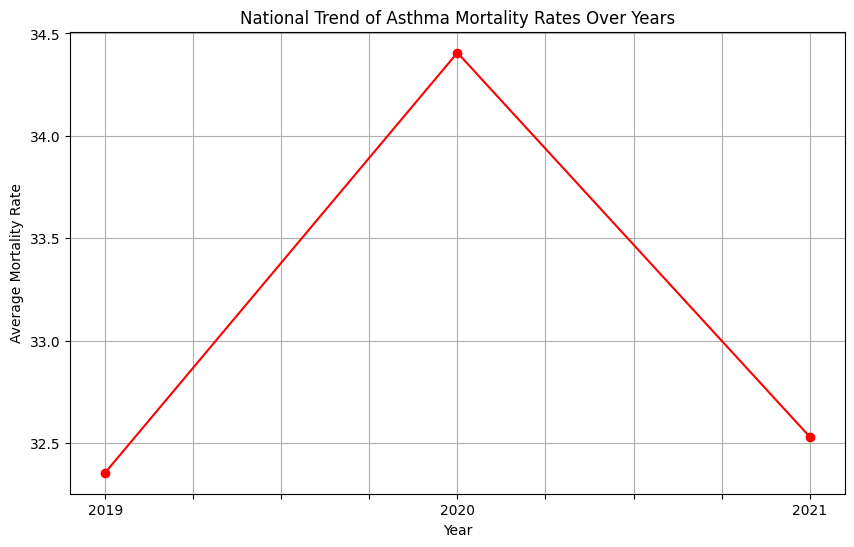

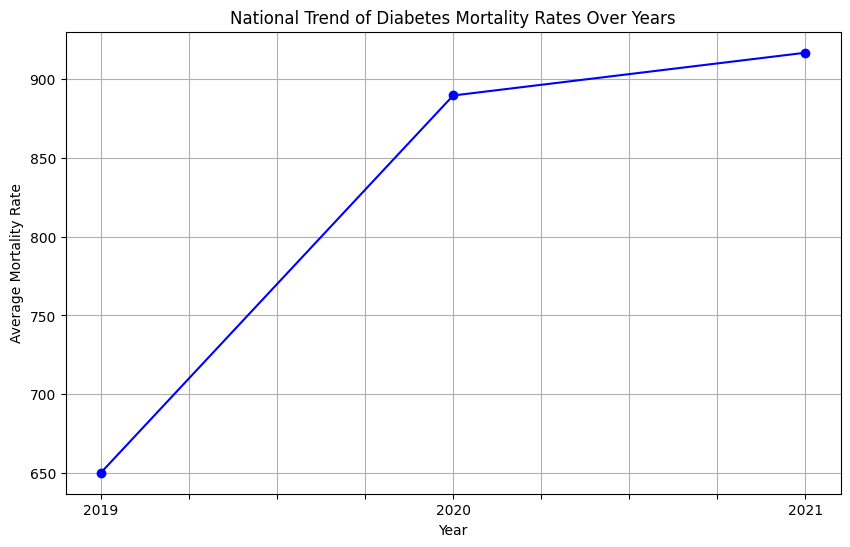

Year,2019,2020,2021
State,,,
Alabama,19.952778,19.680556,21.188889
Alaska,27.000000,27.000000,27.000000
Arizona,22.580556,24.619444,23.069444
Arkansas,24.194444,22.458333,24.347222
California,48.894444,56.597222,46.102778
Colorado,21.677778,21.661111,23.650000
Connecticut,21.527778,23.163889,25.772222
Delaware,27.000000,27.000000,27.000000
District of Columbia,27.000000,27.000000,27.000000


Year,2019,2020,2021
State,,,
Alabama,213.712500,298.495833,335.113889
Alaska,46.118056,67.680556,72.633333
Arizona,345.281944,504.169444,555.129167
Arkansas,214.475000,284.988889,299.466667
California,1897.420833,2611.287500,2759.597222
Colorado,290.169444,371.419444,409.144444
Connecticut,150.711111,201.538889,158.043056
Delaware,69.131944,108.122222,116.444444
District of Columbia,64.731944,106.694444,93.737500


In [ ]:
# Analysis 1

# Importing the required libraries
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML

# Rename 'YearStart' to 'Year' for clarity
CDI_data.rename(columns={'YearStart': 'Year'}, inplace=True)

# Filter data for asthma mortality
asthma_mortality_data = CDI_data[(CDI_data['Topic'] == 'Asthma') & (CDI_data['Question'].str.contains('mortality', case=False))]

# Filter data for diabetes mortality
diabetes_mortality_data = CDI_data[(CDI_data['Topic'] == 'Diabetes') & (CDI_data['Question'].str.contains('mortality', case=False))]

# Aggregate national mortality rates by year for both conditions
national_asthma_rates = asthma_mortality_data.groupby('Year')['DataValue'].mean()
national_diabetes_rates = diabetes_mortality_data.groupby('Year')['DataValue'].mean()

# Plotting the national trend over the years for both conditions
# Plot for Asthma Mortality Rates
plt.figure(figsize=(10, 6))
national_asthma_rates.plot(kind='line', marker='o', color='red')
plt.title('National Trend of Asthma Mortality Rates Over Years')
plt.xlabel('Year')
plt.ylabel('Average Mortality Rate')
plt.grid(True)
plt.show()

# Plot for Diabetes Mortality Rates
plt.figure(figsize=(10, 6))
national_diabetes_rates.plot(kind='line', marker='o', color='blue')
plt.title('National Trend of Diabetes Mortality Rates Over Years')
plt.xlabel('Year')
plt.ylabel('Average Mortality Rate')
plt.grid(True)
plt.show()

# Group and calculate mean mortality rates by State and Year
asthma_statewise_summary = asthma_mortality_data.groupby(['State', 'Year'])['DataValue'].mean().unstack()
diabetes_statewise_summary = diabetes_mortality_data.groupby(['State', 'Year'])['DataValue'].mean().unstack()

# Function to render DataFrame as HTML with borders and title
def render_mortality_table_with_borders(df, title):
    """
    Converts a DataFrame to an HTML table with a border and a title.
    """
    html = f"<h2>{title}</h2>"
    html += df.to_html(border=1)  # Adding border=1 to add borders to the table cells
    return html

# Generate HTML for asthma and diabetes mortality rate summaries
asthma_html = render_mortality_table_with_borders(asthma_statewise_summary, "Asthma Mortality Rates Statewide Summary")
diabetes_html = render_mortality_table_with_borders(diabetes_statewise_summary, "Diabetes Mortality Rates Statewide Summary")

# Display the tables
display(HTML(asthma_html))
display(HTML(diabetes_html))


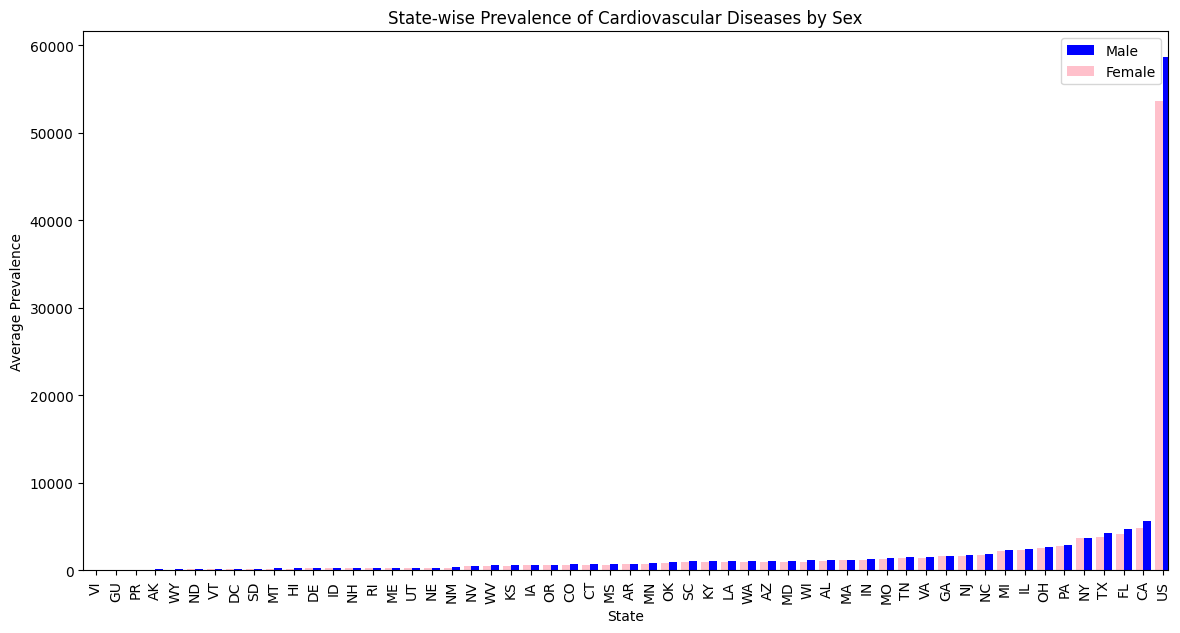

In [ ]:
# Analysis 2

# Importing the required libraries
import matplotlib.pyplot as plt

# Filtering data for cardiovascular diseases and focusing on male and female stratifications
cardio_male_data = CDI_data[(CDI_data['Topic'] == 'Cardiovascular Disease') & (CDI_data['Stratification1'] == 'Male')]
cardio_female_data = CDI_data[(CDI_data['Topic'] == 'Cardiovascular Disease') & (CDI_data['Stratification1'] == 'Female')]

# Calculating average prevalence by state for males
statewise_prevalence_male = cardio_male_data.groupby('LocationAbbr')['DataValue'].mean().sort_values()

# Calculating average prevalence by state for females
statewise_prevalence_female = cardio_female_data.groupby('LocationAbbr')['DataValue'].mean().sort_values()

# Plotting both on the same graph for comparison
plt.figure(figsize=(14, 7))
statewise_prevalence_male.plot(kind='bar', color='blue', position=0, label='Male', width=0.4)
statewise_prevalence_female.plot(kind='bar', color='pink', position=1, label='Female', width=0.4)
plt.title('State-wise Prevalence of Cardiovascular Diseases by Sex')
plt.xlabel('State')
plt.ylabel('Average Prevalence')
plt.legend()
plt.xticks(rotation=90)  # Rotating state labels for better visibility
plt.show()

In [30]:
# Displaying unique categories in the 'Question' column
unique_questions = CDI_data['Question'].unique()
print("Unique Questions in the Dataset:")
print(unique_questions)

Unique Questions in the Dataset:
['Diabetes among adults' 'Short sleep duration among high school students'
 'Asthma mortality among all people, underlying cause'
 'Current asthma among adults'
 'Diabetes mortality among all people, underlying or contributing cause'
 'Recent activity limitation among adults' 'Depression among adults'
 'Alcohol use among high school students' 'Life expectancy at birth'
 'Severe joint pain among adults with arthritis'
 'Current cigarette smoking among adults' 'Arthritis among adults'
 'Adults with any disability' 'Binge drinking prevalence among adults'
 'Physical inactivity among adults with arthritis'
 'Influenza vaccination among adults'
 'Binge drinking intensity among adults who binge drink'
 'Chronic liver disease mortality among all people, underlying cause'
 '2 or more chronic conditions among adults'
 'No teeth lost among adults aged 18-64 years'
 'Short sleep duration among adults'
 'Fair or poor self-rated health status among adults'
 'All tee